In [2]:
import background
import my_visualize as visualize

Best genome:
Key: 6098
Fitness: 544.0
Nodes:
	0 DefaultNodeGene(key=0, bias=1.3348658408858012, response=1.0, activation=sigmoid, aggregation=sum)
	1775 DefaultNodeGene(key=1775, bias=0.536934821687523, response=1.0, activation=sigmoid, aggregation=sum)
	1778 DefaultNodeGene(key=1778, bias=-0.24373155218319387, response=1.0, activation=sigmoid, aggregation=sum)
	2249 DefaultNodeGene(key=2249, bias=2.4808041400680185, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-8, 1775), weight=1.5483948557307543, enabled=True)
	DefaultConnectionGene(key=(-8, 1778), weight=1.5999657744795879, enabled=True)
	DefaultConnectionGene(key=(-7, 0), weight=1.3544738845203494, enabled=True)
	DefaultConnectionGene(key=(-7, 1775), weight=-1.5606999356288098, enabled=False)
	DefaultConnectionGene(key=(-7, 1778), weight=0.2092834131345359, enabled=True)
	DefaultConnectionGene(key=(-7, 2249), weight=0.184672333465409, enabled=True)
	DefaultConnectionGene(key=(-6, 1775)

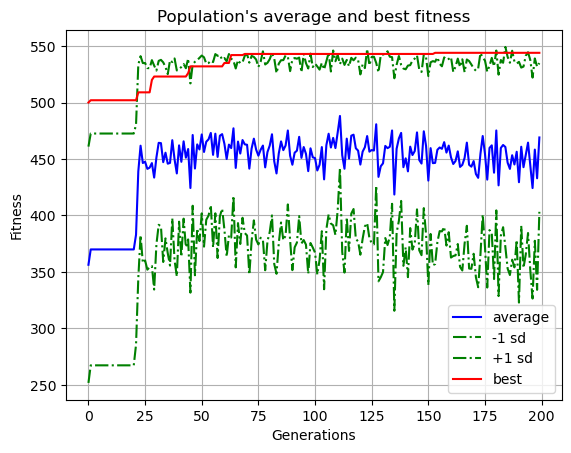

TypeError: cannot unpack non-iterable DefaultGenome object

In [ ]:
winner, stats = background.launch(generations = 200, reporter=False, checkpoint=False)

C:\anaconda3\envs\neat_\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\anaconda3\envs\neat_\lib\site-packages\networkx\drawing\nx_pylab.py:569: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\anaconda3\envs\neat_\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


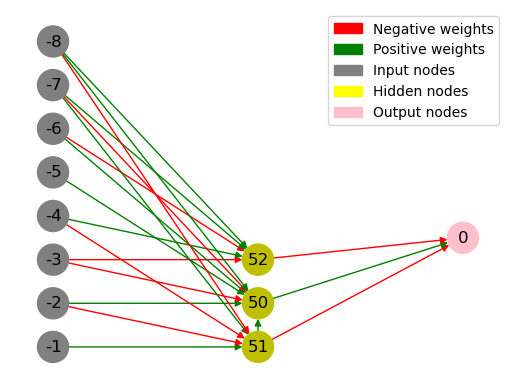

In [7]:
background.plot_the_graph(winner)

In [8]:
node_names = {-1: 'Pregnancies',
              -2: 'Glucose',
              -3: 'BloodPressure',
              -4: 'SkinThickness',
              -5: 'Insulin',
              -6: 'BMI',
              -7: 'DiabetesPedigreeFunction',
              -8: 'Age',
              0: 'Outcome'}

In [52]:
background.save_model(winner, 'models/model.pkl')

In [53]:
loaded_winner = background.load_model('models/model.pkl')

-------------------

# Debug

In [11]:
list_of_nodes = []
for node in winner.connections.values():
    temp = []
    for neuron in node.key:
        temp.append(neuron)
    temp.append(node.weight)
    list_of_nodes.append(temp)

print(list_of_nodes)


[[-1, 51, 1.1986351864815465], [-2, 50, 1.9457099187997398], [-2, 51, -1.6864914846654195], [-3, 50, -5.709779120388123], [-3, 52, -0.8120614259545942], [-4, 51, -0.9319548381891269], [-4, 52, 2.179105531758071], [-5, 50, 1.9632817995995753], [-6, 50, 0.12033633501177726], [-7, 50, -0.02181400005930728], [-7, 51, 1.0231999085702692], [-7, 52, 0.02041166374112195], [-8, 50, 2.8905572391263266], [-8, 51, -0.007509641406637874], [-8, 52, 1.577026790493048], [50, 0, 0.7067844728485138], [51, 0, -1.7440614294069405], [52, 0, -1.3489243472875307], [51, 50, 0.5299678023130263], [-6, 52, -1.5667620468253147]]


In [12]:
for node in list_of_nodes:
    if node[0] > 0 and node[1] > 0:
        # pop the node
        print(node)
        list_of_nodes.remove(node)

[51, 50, 0.5299678023130263]


In [43]:
list_of_nodes

[[-1, 51, 1.1986351864815465],
 [-2, 50, 1.9457099187997398],
 [-2, 51, -1.6864914846654195],
 [-3, 50, -5.709779120388123],
 [-3, 52, -0.8120614259545942],
 [-4, 51, -0.9319548381891269],
 [-4, 52, 2.179105531758071],
 [-5, 50, 1.9632817995995753],
 [-6, 50, 0.12033633501177726],
 [-7, 50, -0.02181400005930728],
 [-7, 51, 1.0231999085702692],
 [-7, 52, 0.02041166374112195],
 [-8, 50, 2.8905572391263266],
 [-8, 51, -0.007509641406637874],
 [-8, 52, 1.577026790493048],
 [50, 0, 0.7067844728485138],
 [51, 0, -1.7440614294069405],
 [52, 0, -1.3489243472875307],
 [-6, 52, -1.5667620468253147]]

In [41]:
inp_nodes_id = []
for node in list_of_nodes:
    if node[0] < 0:
        inp_nodes_id.append(node[0]) 
inp_nodes_id = sorted(set(inp_nodes_id), reverse=True)

In [44]:
inp_nodes_id

[-1, -2, -3, -4, -5, -6, -7, -8]

In [42]:
hidden_nodes_id = []
for node in list_of_nodes:
    if node[1] != 0:
        hidden_nodes_id.append(node[1]) 
hidden_nodes_id = sorted(set(hidden_nodes_id))

In [45]:
hidden_nodes_id

[50, 51, 52]

In [46]:
#plot a graph where the first element of inner list is the first node, the second element is the second node and the third element is the weight of the connection
# the plot must show three levels of neural network. 
# If the node is 0 - it is output. If the node is 85-88 - it is hidden. If the node is -8 - -1- it is input
# the plot must show the connections between the nodes
# the plot must show the weights of the connections

#plot a graph where the first element of inner list is the first node, the second element is the second node and the third element is the weight of the connection

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
# upper level nodes (input) - 8 nodes
#i = 0
#for node in list_of_nodes:
#    G.add_node(node[0], pos=(0, i))
#    if(node[1] > 0):
#        G.add_node(node[1], pos=(1, (1+i)*2))
#    elif(node[1] == 0):
#        G.add_node(node[1], pos=(2, (1+i)*2))
#    G.add_edge(node[0], node[1], weight=node[2])
#    i += 1
sec = 0
for node in inp_nodes_id:
    G.add_node(node, pos=(0, sec))
    sec += 1
# middle level nodes (hidden) - 4 nodes
mid = 1
for node in hidden_nodes_id:
    G.add_node(node, pos=(1, mid))
    mid += 2
# lower level nodes (output) - 1 node
G.add_node(0, pos=(2, 4))

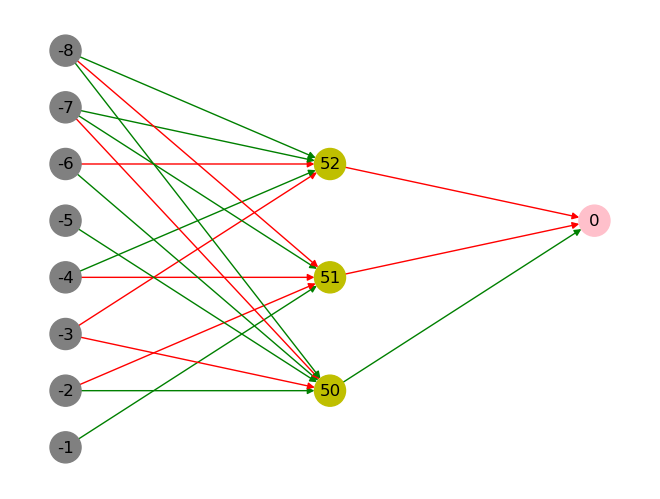

In [56]:
# edges between nodes
for node in list_of_nodes:
    G.add_edge(node[0], node[1], weight=node[2])

# positions of the nodes
pos = nx.get_node_attributes(G, 'pos')

# color the arrows
edge_colors = ['r' if G[u][v]['weight'] < 0 else 'g' for u,v in G.edges()]
# green for input nodes, yellow for hidden nodes, red for output nodes
node_colors = ['gray' if node < 0 else 'y' if node > 0 else 'pink' for node in G.nodes()]

# weights of the edges
weights = nx.get_edge_attributes(G, 'weight')
# draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, node_size=500, arrows=True)
# draw the weights
# nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.show()

In [57]:
for a, b in winner.connections:
    print(a, b)

-1 51
-2 50
-2 51
-3 50
-3 52
-4 51
-4 52
-5 50
-6 50
-7 50
-7 51
-7 52
-8 50
-8 51
-8 52
50 0
51 0
52 0
51 50
-6 52


In [50]:
config = background.config

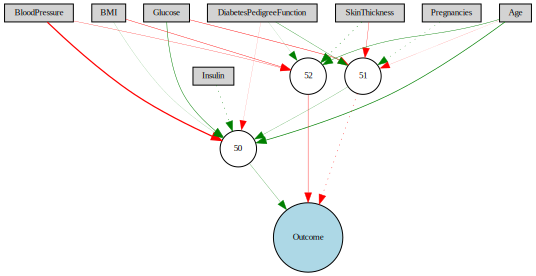

In [51]:
visualize.draw_net(config, winner, True, node_names=node_names)